# 랜덤워크 검사

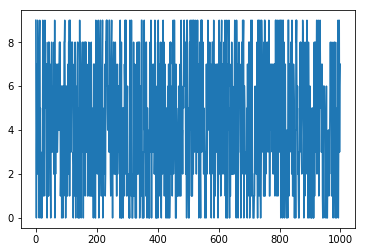

In [36]:
from random import seed
import numpy as np
from random import randrange
from matplotlib import pyplot
%matplotlib inline
seed(1)
series = [np.random.randint(10) for i in range(1000)]
pyplot.plot(series)
pyplot.show()

## 위 신호는 랜덤 넘버의 수열일 뿐이며 랜덤 워크는 아님
- 랜덤 워크가 되려면 다음 신호가 앞 신호로부터 가공되어 함
- y(t) = B0 + B1*X(t-1) + e(t)

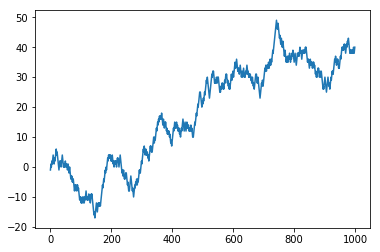

In [49]:
# 랜덤 워크 - 마치 주식 변화처럼 보이지만 랜덤 워크일 뿐. 랜덤 워크는 예측할 수 없다

from random import seed
from random import random
from matplotlib import pyplot
seed(11)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
pyplot.plot(random_walk)
pyplot.show()

## 자기 상관
- autocorrelation plot, a correlogram.
- autocorrelation_plot() 



/Users/hwa-jongkim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  if sys.path[0] == '':


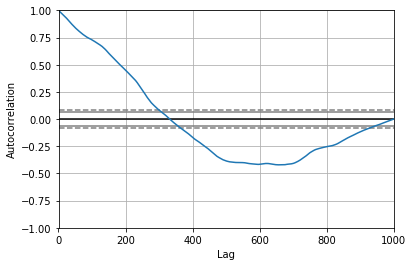

In [56]:
from random import seed
from random import random
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
seed(11)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
	movement = -1 if random() < 0.5 else 1
	value = random_walk[i-1] + movement
	random_walk.append(value)
autocorrelation_plot(random_walk)
pyplot.show()

## non-stationary 검사
- 아래 검사 결과를 보면 non-stationary임을 알 수 있다.
- statistical significance test
- Augmented Dickey-Fuller test

In [57]:
from random import seed
from random import random
from statsmodels.tsa.stattools import adfuller
# generate random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
	movement = -1 if random() < 0.5 else 1
	value = random_walk[i-1] + movement
	random_walk.append(value)
# statistical test
result = adfuller(random_walk)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.341605
p-value: 0.979175
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
